In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
import os

os.chdir(r"C:\Users\Owner\OneDrive\Desktop\bix")

In [6]:
weather_raw=pd.read_csv("bix_weather.csv", )
winners=pd.read_csv("bix_winners2.csv")

#cleaning
raw_columns=weather_raw.columns.to_list()
rename_columns=['Year', 'Date', 'Time', 'Temperature_f', 'Dew_point_f', 'Humidity_%', 'Wind', 'Wind_speed_mph', 'Wind_gust_mph', 'Pressure_in', 'Precip_in', 'Condition', 'Actual_high', 'Historic_avg_high', 'Record_high']
weather_rename_dict=dict(zip(raw_columns,rename_columns))
weather=weather_raw.rename(columns=weather_rename_dict)

winners['Time']=winners['Min']+winners['Sec']/60


In [7]:
win_weather=pd.merge(weather.rename(columns={"Time": "Start_Time"}), winners, how='inner', on='Year')

In [23]:
hex_list = sns.color_palette('RdBu').as_hex()
print(hex_list)
sns.color_palette('RdBu')

['#c13639', '#f09c7b', '#fbe3d4', '#dbeaf2', '#87beda', '#2f79b5']


[(0.7561707035755478, 0.21038062283737025, 0.22352941176470587),
 (0.940715109573241, 0.6099192618223759, 0.4812764321414839),
 (0.9856978085351787, 0.8889657823913879, 0.8320645905420992),
 (0.8605151864667436, 0.9174163783160324, 0.9487120338331411),
 (0.530026912725875, 0.7456362937331797, 0.8560553633217994),
 (0.1843137254901961, 0.47266435986159167, 0.7116493656286044)]

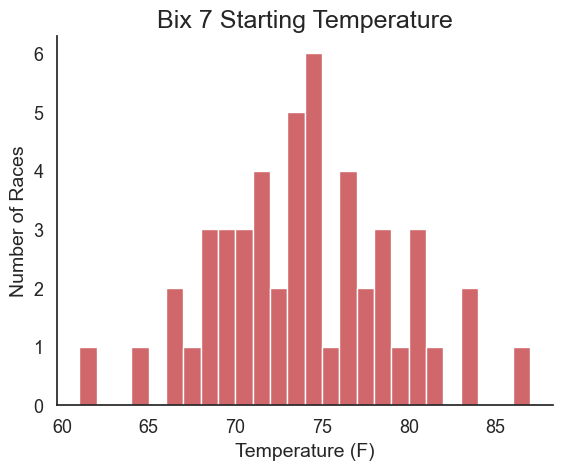

In [8]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)}, palette='RdBu')

plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes


fig, ax = plt.subplots()
_ = ax.set(title='Bix 7 Starting Temperature', xlabel='Temperature (F)', ylabel='Number of Races')
_ = sns.histplot(weather['Temperature_f'],  binwidth = 1)

sns.despine()

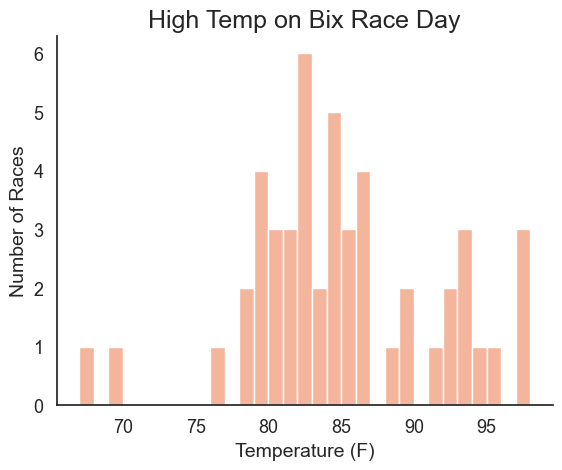

In [9]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)}, palette='RdBu')

plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes


fig, ax = plt.subplots()
_ = ax.set(title='High Temp on Bix Race Day', xlabel='Temperature (F)', ylabel='Number of Races')
_ = sns.histplot(weather['Actual_high'],  binwidth = 1, color="#f09c7b")
sns.despine()

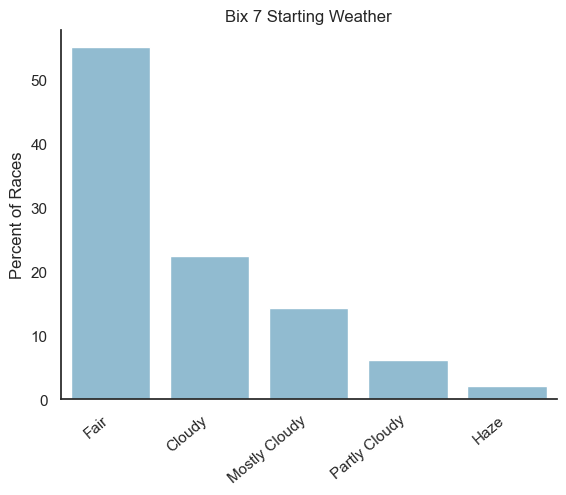

In [21]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
condition_df = weather.groupby('Condition')['Year'].count()\
    .reset_index()\
    .rename(columns={"Year": "Number of Races"})\
    .sort_values(by=["Number of Races"], ascending = False)

condition_df["Percent of Races"]=condition_df["Number of Races"]/len(weather.index)*100

fig, ax = plt.subplots()

sns.barplot(x='Condition', y="Percent of Races", data=condition_df, color = '#87beda')
#sns.barplot(x='Condition', y="Percent of Races", data=condition_df, palette = 'RdBu')

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
_ = ax.set(title='Bix 7 Starting Weather', xlabel = None)
sns.despine()


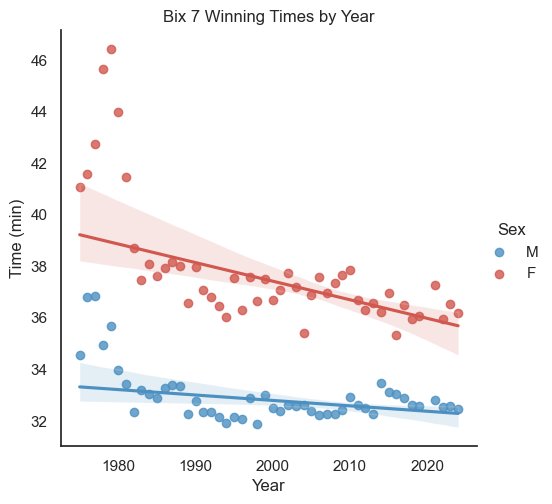

In [22]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
_ = sns.lmplot(data=winners, x="Year", y="Time",  hue="Sex", robust = True, palette=dict(M="#4C90C1", F="#D1584F"))
ax = plt.gca()
#_ = plt.ylim(0,47)
_ = ax.set(title='Bix 7 Winning Times by Year', xlabel = "Year", ylabel = "Time (min)")


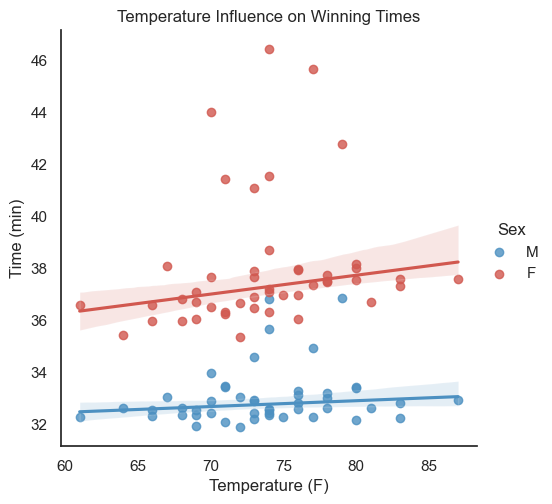

In [276]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)}, palette='RdBu')
_ = sns.lmplot(data=win_weather, x="Temperature_f", y="Time",  hue="Sex", robust = True, palette=dict(M="#4C90C1", F="#D1584F"))
ax = plt.gca()
_ = ax.set(title='Temperature Influence on Winning Times', xlabel = "Temperature (F)", ylabel = "Time (min)")

Text(0.5, 0.98, 'Distribution of Winning Times')

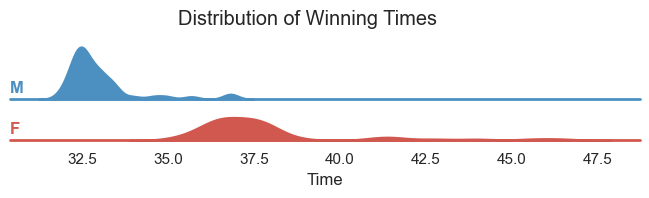

In [12]:

sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)}, palette=["#4C90C1","#D1584F"])

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(winners, row="Sex", hue="Sex", 
                  aspect=7, height=1)

# Draw the densities in a few steps
g.map(sns.kdeplot, "Time", clip_on=False, shade=True, alpha=1, lw=1.5, bw_method=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color, ha="left", va="center", transform=ax.transAxes)
    ax.set_ylabel("")
g.map(label, "Time")

# Set the subplots to overlap/be close-ish
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

# Add an overall title
g.fig.suptitle('Distribution of Winning Times')

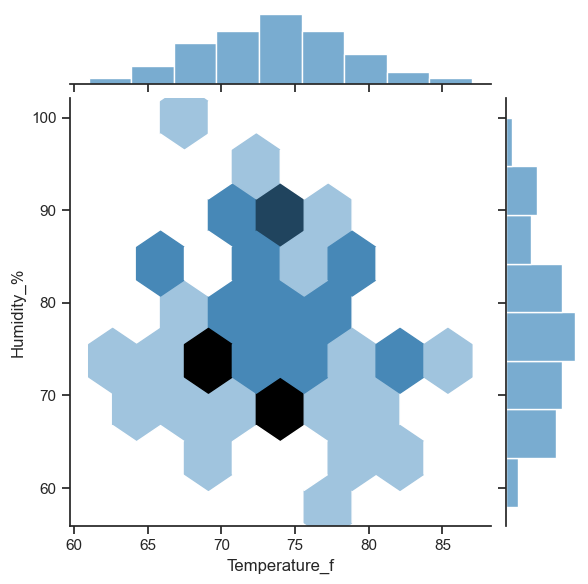

In [14]:
sns.set(style="ticks", palette='RdBu')
_ = sns.jointplot(x='Temperature_f', y='Humidity_%', 
   data = win_weather, kind="hex", color = "#4C90C1")
#sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False)

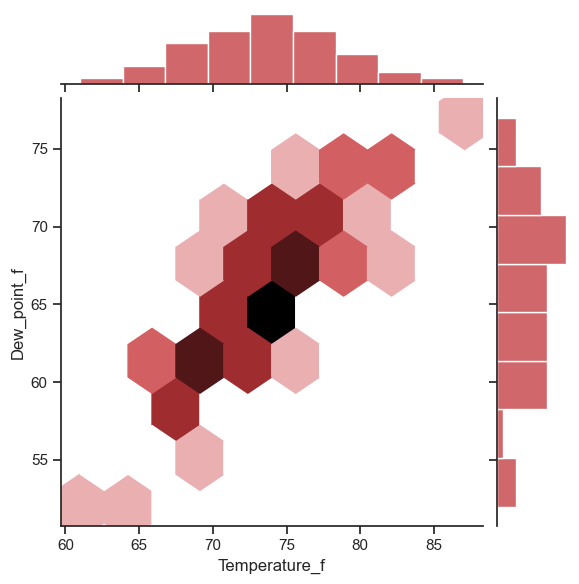

In [15]:
sns.set(style="ticks",palette='RdBu')
_ = sns.jointplot(x='Temperature_f', y='Dew_point_f', 
   data = win_weather, kind="hex", color = "#c13639")

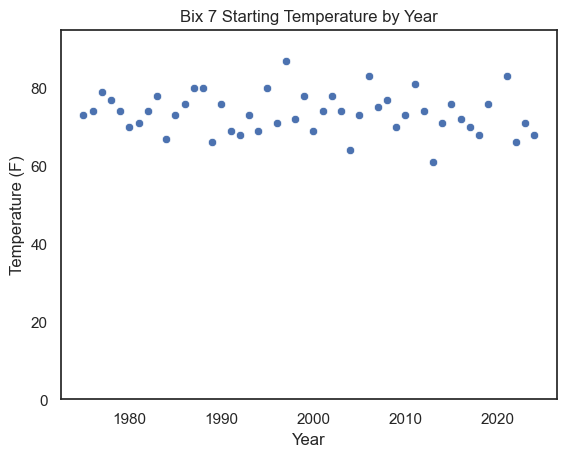

In [28]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
_ = sns.scatterplot(data=weather, x="Year", y="Temperature_f")

ax = plt.gca()
_ = plt.ylim(0,95)
_ = ax.set(title='Bix 7 Starting Temperature by Year', xlabel = "Year", ylabel = "Temperature (F)")

